# Install CCXT

In [1]:
!pip install ccxt

/home/ecotrace/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.16.0-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/home/ecotrace/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/ecotrace/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


# Load Binance

In [2]:
import ccxt

# Load Binance
binance = ccxt.binance ()
binance.load_markets ()

print ('binance: %d markets loaded!' % len (binance.markets))

binance: 2131 markets loaded!


# Set Up The Chart Drawing

In [3]:
# Enables 2x resolution for Retina displays
%config InlineBackend.figure_format = 'retina'

# This is the library we will use for chart drawing
import matplotlib.pyplot as plt

# Configure the look
plt.style.use ('seaborn-white')
plt.rcParams["figure.figsize"] = [15,6]

# Display ETH/USDT prices

<AxesSubplot:>

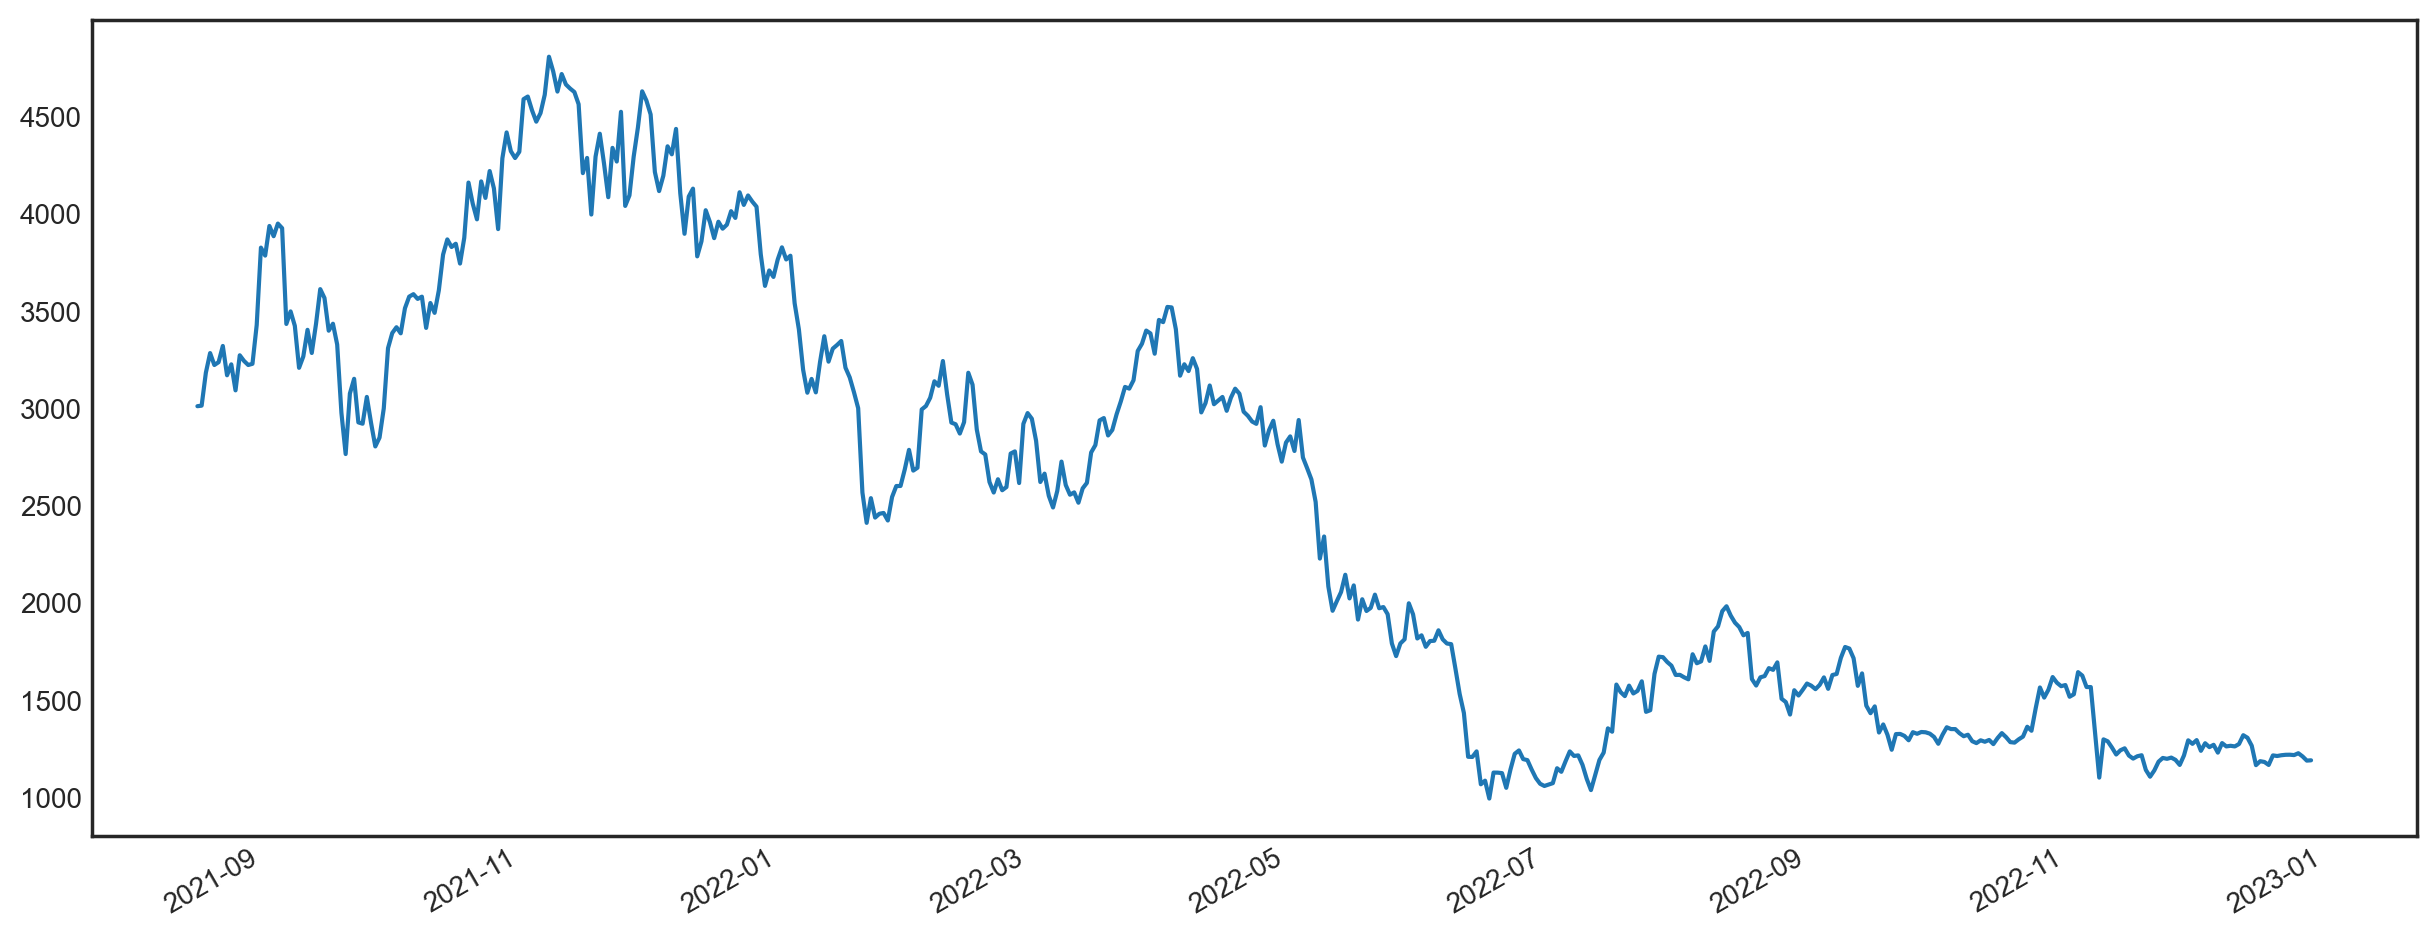

In [4]:
import pandas as pd
from datetime import datetime

pair = 'ETH/USDT'

# Load OHLCV (open/high/low/close/volume) data with 1-day resolution
ohlcv = binance.fetch_ohlcv (pair, '1d')

# Get closing prices for each day
prices = [x[4] for x in ohlcv]

# Convert Unix timestamps to Python dates
dates = [datetime.fromtimestamp (x[0] // 1000) for x in ohlcv]

# Prepare a Pandas series object
data = pd.Series (prices, index=dates) 

# Draw a simple line chart
data.plot ()